In [1]:
import cv2
import joblib
import os
from matplotlib import pyplot as plt

In [ ]:
from src.features import *

def preprocess(image):
    image = cv2.resize(image, (64, 64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    feature = extract_color_histogram(image)
    return feature


def predict(image, model):
    features = preprocess(image)
    prediction = model.predict([features])
    return "Not smoking" if prediction[0] == 0 else "Smoking"

In [ ]:
model_name = "color_histogram.pkl"
# model_name = "hog.pkl"
# model_name = "lpb.pkl"

model_path = os.path.join("src/checkpoint", model_name)
model = joblib.load(model_path)

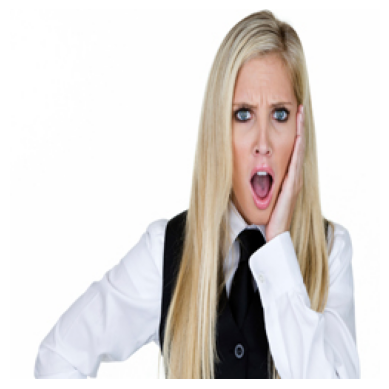

In [ ]:
test_path = "data/Testing/images"
image_path = os.path.join(test_path,"notsmoking_0534.jpg")

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh sử dụng matplotlib
plt.imshow(image)
plt.axis('off')  # Tắt hiển thị trục
plt.show()

In [6]:
print(predict(image, model))

Not smoking
